In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [194]:
df = pd.read_csv('../data/processed/dataset.csv')

In [195]:
df

,Unnamed: 0,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
0,0,85,85,0,0,0,0,1
1,1,80,90,1,0,0,0,1
2,2,83,86,0,1,1,0,0
3,3,70,96,0,1,0,1,0
4,4,68,80,0,1,0,1,0
5,5,65,70,1,0,0,1,0
6,6,64,65,1,1,1,0,0
7,7,72,95,0,0,0,0,1
8,8,69,70,0,1,0,0,1
9,9,75,80,0,1,0,1,0


In [196]:
X = df.drop(['Unnamed: 0', 'play'], axis=1).values
y = df['play'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [198]:
mlp = MLPClassifier(solver='sgd', activation='logistic', random_state=1, batch_size=4, learning_rate_init=0.001, max_iter=1000, hidden_layer_sizes=(6,))

In [199]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [200]:
mlp.score(X_train, y_train)

0.6363636363636364

In [201]:
mlp.predict(X_test)

array([1, 1, 1])

In [202]:
mlp.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

In [204]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 6)
        self.sig1 = nn.Sigmoid()
        self.fc2 = nn.Linear(6, 6)
        self.sig2 = nn.Sigmoid()
        self.fc3 = nn.Linear(6, 1)
        self.sig3 = nn.Sigmoid()

    def forward(self, x):
        a1 = self.fc1(x)
        h1 = self.sig1(a1)
        a2 = self.fc2(h1)
        h2 = self.sig2(a2)
        a3 = self.fc3(h2)
        y = self.sig3(a3)
        return y

In [205]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.MSELoss()

In [210]:
import random
def train_epoch(model, opt, criterion, batch_size=4):
    model.train()
    losses = []
    for batch_idx in np.random.choice(len(list(X)), batch_size):
        x_batch = Variable(torch.FloatTensor(np.array(X[batch_idx])))
        y_batch = Variable(torch.FloatTensor(np.array([y[batch_idx]])))
        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        losses.append(loss.data.numpy())
    return losses

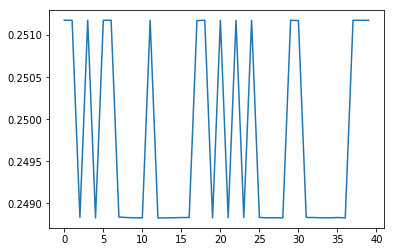

In [211]:
import matplotlib.pyplot as plt
e_losses = []
num_epochs = 10
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)